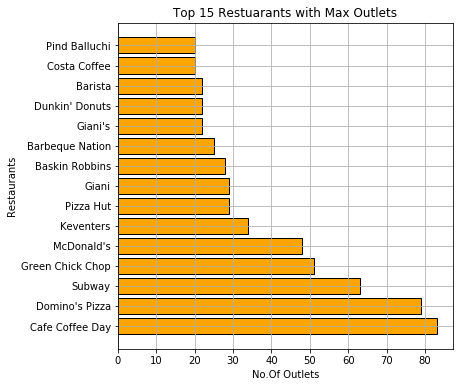

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df[df['Country Code'] == 1] #only india
lis = df['Restaurant Name'].value_counts()[0:15] #getting top 15
names = list(lis.index)
outlets = list(lis.values)

plt.figure(figsize = (6,6))
plt.barh(names,outlets,color = 'orange',edgecolor = 'black') #horizontal bargraph
plt.title('Top 15 Restuarants with Max Outlets')
plt.ylabel('Restaurants')
plt.xlabel('No.Of Outlets')
plt.grid()
plt.show()

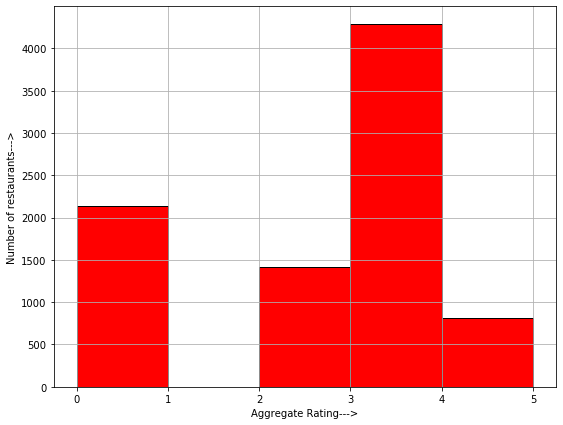

In [2]:
x=df['Aggregate rating'].dropna() # given in the question to drop null
plt.figure(figsize=(9, 7))
plt.xticks(range(6))
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Number of restaurants--->')
plt.hist(x, color='red', edgecolor='black', bins=range(6))
#fixed the bins exactly to align with the xticks.
plt.grid()
plt.show()

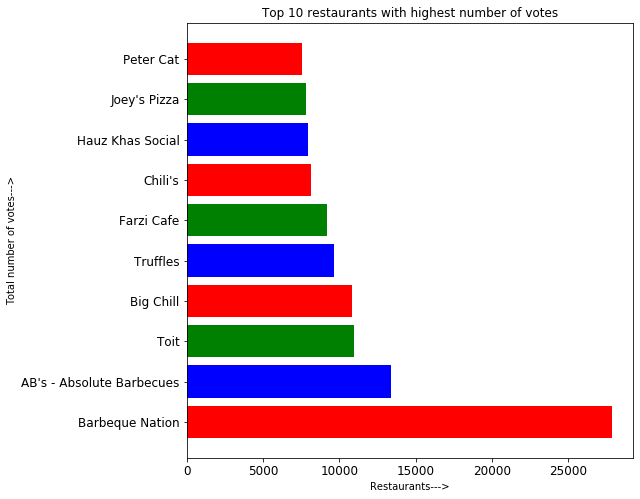

In [4]:
np_restaurants=np.array([i for i in df['Restaurant Name']])
np_votes=np.array([i for i in df['Votes']])
#i have created two numpy arrays of votes and restaurants from the dataframe
dic=dict()
#i have summed up the number of votes of different restaurants in the dctionary
for i in range(len(np_restaurants)):
    if np_restaurants[i] in dic.keys():
        dic[np_restaurants[i]]+=np_votes[i]
    else:
        dic[np_restaurants[i]]=np_votes[i]
#when the dictionary is created, i have appended all the values and the keys of the dictionary in the numpy arrays.
#because it will then be easier for me to plot them and even arrange them in ascending order
np_r=np.array([i for i in dic.keys()])
np_v=np.array([i for i in dic.values()])
np_r=np_r[np.argsort(np_v)][::-1]#sorted
np_v=np_v[np.argsort(np_v)][::-1]#sorted

#plotted finally
plt.figure(figsize=(8, 8))
plt.barh(np_r[0:10], np_v[0:10], color='rbg')
plt.xlabel('Restaurants--->')
plt.ylabel('Total number of votes--->')
plt.title('Top 10 restaurants with highest number of votes')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

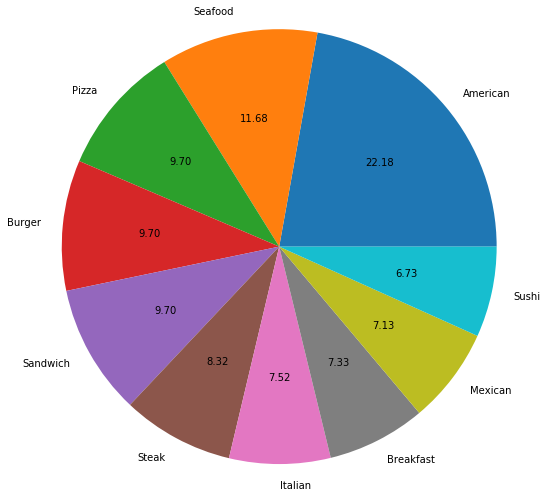

In [5]:
#top cuisinies will be those which are served by maximum number of restaurants.
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
#copied and filtered the data according to the question
df=df.loc[df['Cuisines'].notnull()]#filtering and keeping all the non null values.
df=df.loc[df['Country Code']== 216]# USA Country code is 216 so we need only restuarants of USA
cus=[]#i have appended all the cuisinies available in this list and their frequency is stored as dictionary values.
for i in df.Cuisines:
    for j in i.split(','):
        cus.append(j.strip())
dic=dict()
for i in cus:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
#finally our dictionary is created
#appended the values and keys of the dictionary in the numpy arrays for the easiness of sorting and plotting later.
np_cuisines=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_cuisines=np_cuisines[np.argsort(np_freq)][::-1]#sorted
np_freq=np.sort(np_freq)[::-1]#sorted
#plotted
plt.pie(np_freq[0:10], labels=np_cuisines[0:10], radius=2.5, autopct='%.2f')
plt.show()

<Figure size 432x288 with 0 Axes>

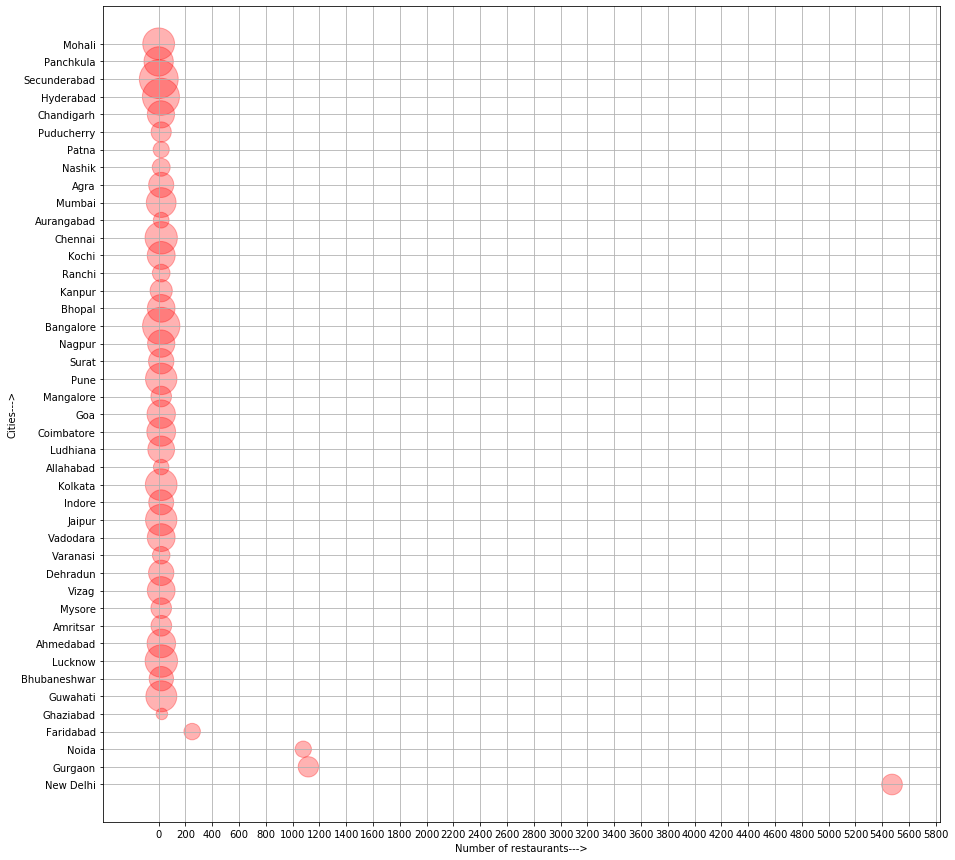

<Figure size 432x288 with 0 Axes>

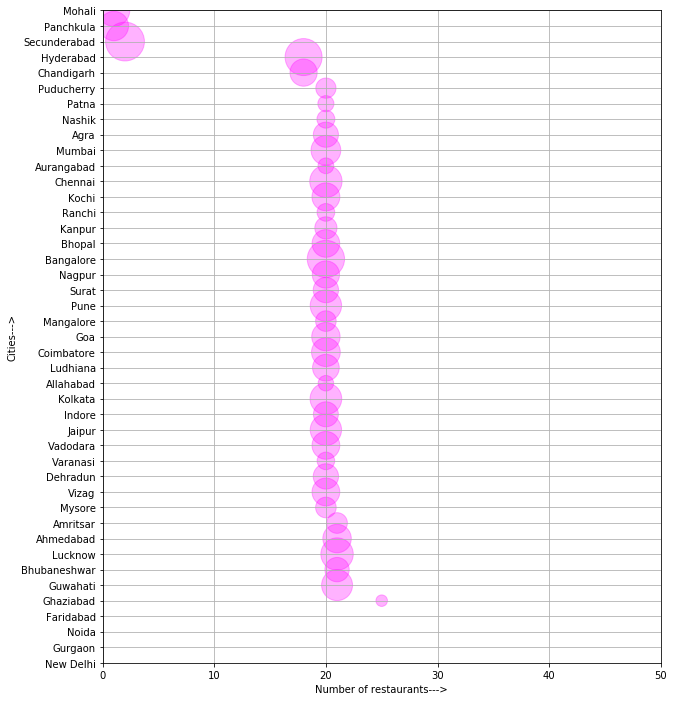

In [87]:
#in this question i have made 2 graphs the first one is between cities and number of restaurants and the second graph is
#the same except its x coordinates are in the range 0 to 50 for a clear visualisation of the first graph.
#i.e. the second graph is the enlarged version of the first graph.
#both the graphs are same except the variation in the range of x axis.

df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df = df[df['Country Code'] == 1] #only inidian Cities
cities = np.array((df['City'].value_counts()).index) #unique cities
num_of_restuarants = np.array((df['City'].value_counts()).values) #restuarants w.r.t to each city
weight = [] # for wrr
for i in cities:
    city_df = df[df['City'] == i]
    votes = np.array(city_df['Votes']) #only votes in present city
    rating = np.array(city_df['Aggregate rating']) #only rating in present city
    numerator = sum(votes * rating) # as the formula of wrr 
    denominator = sum(votes)
    if(denominator != 0) : wrr = numerator/denominator #to avoid exception
    else : wrr = 0
    weight.append(wrr)

#plotted first graph
plt.subplots(0, 2)
plt.figure(figsize = (15,15))
plt.xticks(np.arange(0,6000,200))
plt.scatter(num_of_restuarants,cities,s = 5**np.array(weight),alpha = 0.3,color = 'red')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.grid()
plt.show()

#plotted the same graph with zoomed x axis. to analyse it properly
plt.subplots(0, 1)
plt.figure(figsize=(10, 12))
plt.scatter(num_of_restuarants,cities,s = 5**np.array(weight),alpha = 0.3,color = 'magenta')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.axis([0, 50, 'New Delhi', 'Mohali'])
plt.grid()
plt.show()
#these bubbles in the graph are overlapping but it is still recognizabe.
